In [2]:
from scipy import signal

In [3]:
from scipy.fft import fft

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [20]:
def periodogram(x: np.array, window: str = 'boxcar', one_sided: bool = True) -> np.array:
    """ Estimate a signal's power spectrum with the discrete periodogram.
        @param x          Samples of the random signal realization
        @param window     Type of window
        @param one_sided  Whether to return only the real frequencies [0,pi] or all of them [0,2pi]
        @return Power spectrum density estimation
    """
    # Validate the type of window
    if type(window) is not str:
        raise ValueError('Window must be a string value, unexpected type of data')
    
    # Validate signal samples
    if type(x) is not np.array and type(x) is not np.ndarray:
        raise ValueError('Signal samples must be np.array, unexpected type of data')
    elif x.ndim > 1:
        raise ValueError('The signal samples argument must be 1D')
        
    # Validate the one sided parameter
    if type(one_sided) is not bool:
        raise ValueError('Argument one_sided must be boolean, unexpected type of data')
    
    # Obtain amount of samples
    N = len(x)
    
    # Apply window to input samples
    w = signal.windows.get_window(window, N)
    v = x * w
    
    # Normalize window energy
    scale = np.sum(w * w) / N
        
    # Compute windowed data FFT. With norm="ortho" we don't need to divide by N.
    V = fft(v, norm="ortho")
    
    # Square the elements
    Rx = np.abs(V) ** 2 / scale
    Rx[0] = np.mean(v)

    # If one sided, use only the real frequencies with the same energy
    if one_sided:
        Rx = 2 * Rx[0:int(np.round(N/2))]
    
    return Rx

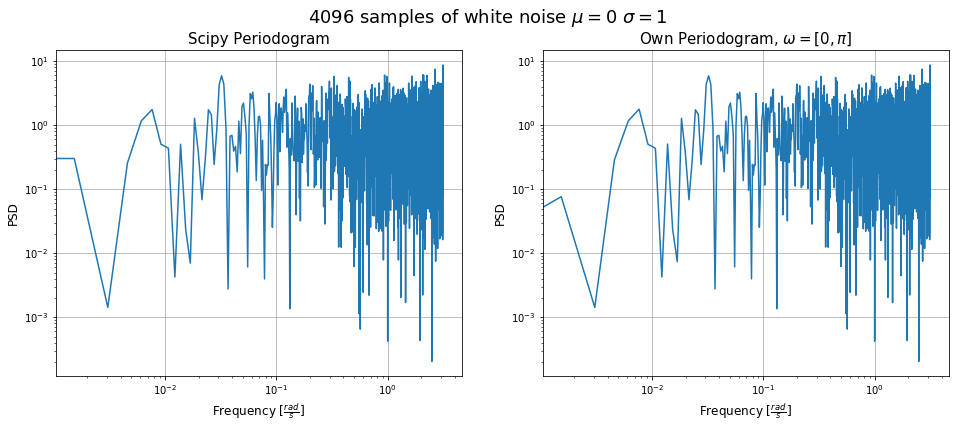

In [23]:
""" Compare with scipy.signal's periodogram """
N = 4096
window = 'triang'
one_sided = False

# Generate white gaussian noise with zero mean and unity standard deviation
x = np.random.normal(size=N)

# Estimate the power spectrum density with scipy's implementation, use two-sided version
_, periodogram_scipy = signal.periodogram(x, return_onesided=one_sided, window=window)

# Estimate the power spectrum density with our implementation
periodogram_itba = periodogram(x, window=window, one_sided=one_sided)

# Plot the result
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f'{N} samples of white noise $\mu=0$ $\sigma=1$', fontsize=18)

ax[0].loglog(np.arange(0, np.pi, (np.pi) / (N // 2)), periodogram_scipy[0:N//2])
ax[0].set_title('Scipy Periodogram', fontsize=15)
ax[0].set_xlabel('Frequency [$\\frac{rad}{s}$]', fontsize=12)
ax[0].set_ylabel('PSD', fontsize=12)
ax[0].grid()

ax[1].set_title(f'Own Periodogram, $\omega=[0,\pi]$', fontsize=15)
ax[1].loglog(np.arange(0, np.pi, (np.pi) / (N // 2)), periodogram_itba[0:N//2])
ax[1].set_xlabel('Frequency [$\\frac{rad}{s}$]', fontsize=12)
ax[1].set_ylabel('PSD', fontsize=12)
ax[1].grid()